### Lidando com valores ausentes
Existem muitas formas de lidarmos com valores ausentes. Algumas opcoes sao:
- Verificar a possibilidade de recoleta do dado;
- Dropar os dados. Podendo dropar a variavel toda, ou a linha toda;
- Substituir os valores ausentes. Podemos substituir pela media da variavel, pela mediana, ou por algum outro valor que seja julgado adequado.
- Deixar os valores ausentes, ausentes.

In [ ]:
import numpy as np

# dropar dados ausentes
df.dropna(# axis = 0 ---> dropa a linha inteira. axis = 1 ---> dropa a coluna inteira)
df.dropna(subset=['Salary']), axis=0, inplace=True) # dropa as linhas com NaN na coluna Salary, e modifica o dataframe.

In [ ]:
# substituir dados
media = df['Salary'].mean()
df['Salary'].replace(np.nan, media, inplace=True) # Substitui os valores ausentes pela media calculada, e modifica diretamente no dataframe.

### Formatando os dados
Dados sao coletados de muitas formas e armazenados em formatos diferentes. Devido a isso, precisamos realizar algumas formatacoes para que os dados fiquem no mesmo padrao, e possam ser utilizados adequadamente. Pode ocorrer tambem de a variavel receber a configuracao errada de formato de dado, para isso contornar isso, precisamos identificar as colunas com essa configuracao inadequade, e corrigi-la.

Para verificar o tipo de dado das variaveis do nosso dataset, podemos utilizar a funcao "dtypes()". E, em caso de confirmacao de erro de formato de dado, podemos usar a funcao "astype()" para fazer a correcao.

### Normalizacao
Eh uma tecnica que usamos para colocar os valores em escalas consistentes, melhorar o desempenho dos modelos que implementarmos, facilitar a comparacao entre outras variaveis, entre outras coisas. 

Por exemplo, podemos ter uma variavel "altura" em metros, e uma variavel "peso" em kilos. A normalizacao colocara as variaveis em uma escala comum, o que ajudara na hora de executar algumas tarefas.

Entre as tecnicas existentes, temos:
- Min-Max Scaling: redimensiona os dados para um intervalo especifico que, geralmente, fica entre 0 e 1. Util para preservar a distribuicao dos dados.
- Z-Score: Transforma os dados para que tenham media 0 e desvio-padrao 1. Util quando os dados seguem uma normal.

### Tranformando variaveis qualitativas em variaveis quantitativas
Alguns modelos estatisticos nao conseguem trabalhar com strings na entrada, para contornar esse problema, precisamos converter os dados de qualitativos para quantitativos. 

Uma tecnica muito popular que eh utilizada para esse problema se chama _One Hot Encoding_. Usando o Pandas, podemos aplicar essa tecnica atraves do metodo "get_dummies()".

### Algumas funcoes uteis

- value_counts: exibe os valores presentes em determinada variavel;
- idxmax: exibe o valor mais comum em determinada variavel;
- replace: usado para fazer substituicao de valores;
- astype: usado para definir o tipo de dado na variavel;
- mean: calcula a media;
- dropna: dropa os valores nan;
- reset_index: reseta o index;
- dtypes: exibe o tipo de dado do df;
- rename: renomeia a coluna desejada

<hr>

## Vamos exemplificar um pouco o que vimos ate agora.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=None)

In [3]:
df.columns = df.iloc[0] # Primeira linha como cabecalho
df = df[1:] # Remove a linha 0 do DF
df.reset_index(drop=True, inplace=True) # Reseta o index.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nan             238 non-null    float64
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    object 
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    object 
 5   OS              238 non-null    object 
 6   CPU_core        238 non-null    object 
 7   Screen_Size_cm  234 non-null    object 
 8   CPU_frequency   238 non-null    object 
 9   RAM_GB          238 non-null    object 
 10  Storage_GB_SSD  238 non-null    object 
 11  Weight_kg       233 non-null    object 
 12  Price           238 non-null    object 
dtypes: float64(1), object(12)
memory usage: 24.3+ KB


In [4]:
df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4.0,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [5]:
# Vamos arredondar a variavel "Screen_Size_cm" para 2 casas depois da virgula
df['Screen_Size_cm'] = pd.to_numeric(df['Screen_Size_cm'], errors='coerce') # Converte para numerico
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)
df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,1.0,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.2,634
2,2.0,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.2,946
3,3.0,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4.0,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [6]:
# Vamos verificar quais colunas tem valores nulos
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

nan
nan
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [7]:
# Converter Weight_kh para numerico
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')

In [8]:
# A seguir, vamos substituir os valores nulos da variavel Weight_kg pela media da coluna.
avg_weight = df['Weight_kg'].mean(axis=0)
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [9]:
# Substituir os valores nulos da variavel Screen_Size_cm pela moda.
mode_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].replace(np.nan, mode_screen_size, inplace=True)

In [10]:
# Vamos padronizar os dados. 1 inch = 2.54 cm; 1 kg = 2.205 pounds
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inch'}, inplace=True)

df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg': 'Weight_pounds'}, inplace=True)

df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0.0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1.0,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2.0,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3.0,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4.0,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [12]:
# Arredondar para duas casas depois da virgula
df['Screen_Size_inch'] = np.round(df['Screen_Size_inch'], 2)

df['Weight_pounds'] = np.round(df['Weight_pounds'], 2)

df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0.0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.53,978
1,1.0,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85,634
2,2.0,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85,946
3,3.0,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69,1244
4,4.0,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21,837


In [14]:
# Normalizacao dos dados
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')

df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0.0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.53,978
1,1.0,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.85,634
2,2.0,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.85,946
3,3.0,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.69,1244
4,4.0,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.21,837


In [16]:
# Criar bins
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

bins = np.linspace(min(df['Price']), max(df['Price']), 4)
names = ['Low', "Medium", "High"]
df['Price_bin'] = pd.cut(df['Price'], bins=bins, labels=names)

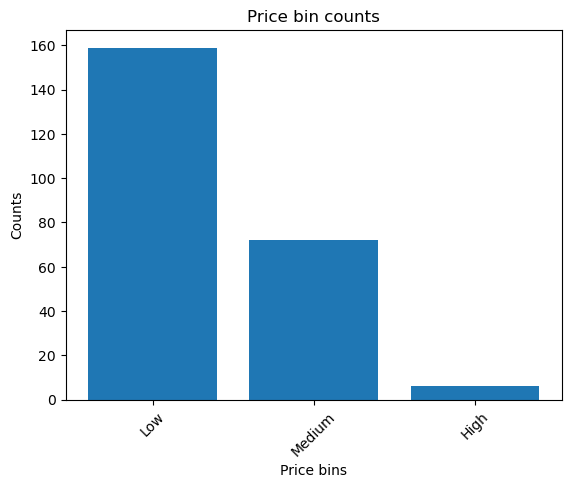

In [18]:
plt.bar(names, df['Price_bin'].value_counts())
plt.xlabel('Price bins')
plt.ylabel('Counts')
plt.title('Price bin counts')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Criar OHE
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [20]:
df.head()

,NaN,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_bin,Screen-Full_HD,Screen-IPS_panel
0,0.0,Acer,4,2,1,5,14.0,0.551724,8,256,3.53,978,Low,False,True
1,1.0,Dell,3,1,1,3,15.6,0.689655,4,256,4.85,634,Low,True,False
2,2.0,Dell,3,1,1,7,15.6,0.931034,8,256,4.85,946,Low,True,False
3,3.0,Dell,4,2,1,5,13.3,0.551724,8,128,2.69,1244,Low,False,True
4,4.0,HP,4,2,1,7,15.6,0.620690,8,256,4.21,837,Low,True,False
